In [ ]:
!pip install -q accelerate>=0.21.0 transformers[torch] torch datasets

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [ ]:
from transformers import MarianMTModel, MarianTokenizer, T5ForConditionalGeneration, T5Tokenizer
from datasets import load_dataset
import torch


In [ ]:
dataset = load_dataset('wmt14', 'fr-en')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/40836715 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3003 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
train_dataset = dataset['train']
val_dataset = dataset['validation']


In [ ]:
print("Training dataset:")
for i, r in enumerate(train_dataset[:5]['translation']):
    print(f"Example {i}:")
    print(f"Source: {r['en']}")
    print(f"Target: {r['fr']}")
    print()

print("Validation dataset:")
for i, r in enumerate(val_dataset[:5]['translation']):
    print(f"Example {i}:")
    print(f"Source: {r['en']}")
    print(f"Target: {r['fr']}")
    print()


Training dataset:
Example 0:
Source: Resumption of the session
Target: Reprise de la session

Example 1:
Source: I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.
Target: Je déclare reprise la session du Parlement européen qui avait été interrompue le vendredi 17 décembre dernier et je vous renouvelle tous mes vux en espérant que vous avez passé de bonnes vacances.

Example 2:
Source: Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful.
Target: Comme vous avez pu le constater, le grand "bogue de l'an 2000" ne s'est pas produit. En revanche, les citoyens d'un certain nombre de nos pays ont été victimes de catastrophes naturelles qui ont vraiment été terribles.

Example 3:
Source: You have reques

50000
50000


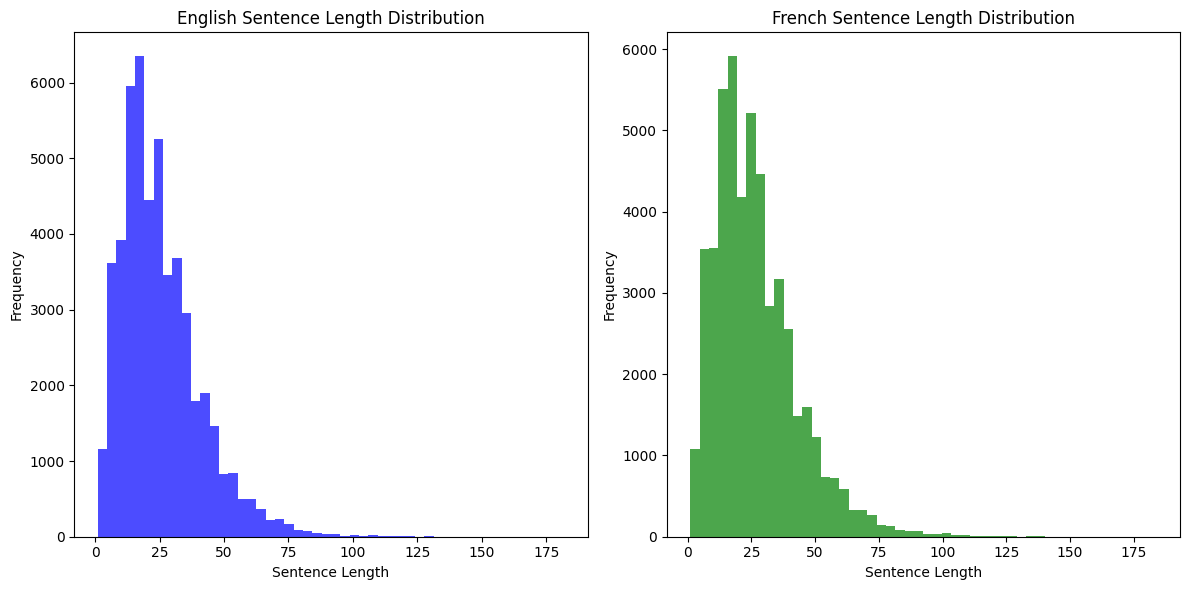

In [ ]:
import matplotlib.pyplot as plt

# Get lengths of English and French sentences
english_lengths = [len(sample['en'].split()) for sample in train_dataset[:50000]['translation']]
french_lengths = [len(sample['fr'].split()) for sample in train_dataset[:50000]['translation']]

print(len(english_lengths))
print(len(french_lengths))
# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(english_lengths, bins=50, color='blue', alpha=0.7, label='English')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('English Sentence Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(french_lengths, bins=50, color='green', alpha=0.7, label='French')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('French Sentence Length Distribution')

plt.tight_layout()
plt.show()


In [ ]:
from transformers import MarianMTModel, MarianTokenizer, GenerationConfig

# Define generation configuration
generation_config = GenerationConfig(
    max_length=512,
    num_beams=4,
    bad_words_ids=[[59513]],
    forced_eos_token_id=0,
    use_return_dict=True
)

model_name = 'Helsinki-NLP/opus-mt-en-fr'
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

# model.config = generation_config


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
print(torch.cuda.is_available())
# Move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

True


MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(59514, 512, padding_idx=59513)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(59514, 512, padding_idx=59513)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLU()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,), eps=1e-05

In [ ]:
def tokenize_function(examples):
    examples=examples['translation']
    if model_name.startswith('Helsinki-NLP'):
        inputs = [r['en'] for r in examples]
        targets  = [r['fr'] for r in examples]
    else:
        inputs = ['translate English to French: ' + r['en'] for r in examples]
        targets = [r['fr'] for r in examples]

    inputs = tokenizer(inputs, padding='max_length', truncation=True, max_length=128)
    targets = tokenizer(targets, padding='max_length', truncation=True, max_length=128)

    inputs['labels'] = targets['input_ids']
    return inputs

In [ ]:
from datasets import Dataset, DatasetDict
import gc
from tqdm import tqdm


def accumulate_batches(dataset, batch_size, tokenize_function):
    num_batches = len(dataset) // batch_size + 1
    num_batches = 3 if num_batches < 5 else 50  # stricted because of time and memory limits
    print("Should use", len(dataset) // batch_size + 1, "batches, but will use", num_batches, "due to time/storage limits")

    tokenized_batches = []

    for i in tqdm(range(num_batches), desc="Processing batches"):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(dataset))
        batch = dataset.select(range(start_idx, end_idx))

        tokenized_batch = Dataset.from_dict(tokenize_function(batch))
        tokenized_batches.append(tokenized_batch)

        del tokenized_batch
        gc.collect()

    # Concatenate all batches into a single Dataset
    concatenated_dict = {k: sum([batch[k] for batch in tokenized_batches], []) for k in tokenized_batches[0].column_names}
    concatenated_dataset = Dataset.from_dict(concatenated_dict)

    return concatenated_dataset


In [ ]:

# Tokenize the train and validation datasets in smaller batches
batch_size = 1000  # change the batch size according to storege / time limites

tokenized_train = accumulate_batches(train_dataset, batch_size, tokenize_function)
tokenized_val = accumulate_batches(val_dataset, batch_size, tokenize_function)

# Save the tokenized datasets to disk
# tokenized_train.save_to_disk('tokenized_train')
# tokenized_val.save_to_disk('tokenized_val')

Should use 40837 batches, but will use 50 due to time/storage limits


Processing batches: 100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


Should use 4 batches, but will use 3 due to time/storage limits


Processing batches: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


In [ ]:
print("train:"+str(len(tokenized_train)))
print("val:"+str(len(tokenized_val)))

train:50000
val:3000


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.525000,0.552328
2,0.460100,0.520117
3,0.433200,0.513815


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=9375, training_loss=0.50053736328125, metrics={'train_runtime': 4071.1995, 'train_samples_per_second': 36.844, 'train_steps_per_second': 2.303, 'total_flos': 5084754739200000.0, 'train_loss': 0.50053736328125, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.5138148069381714, 'eval_runtime': 22.7765, 'eval_samples_per_second': 131.715, 'eval_steps_per_second': 8.254, 'epoch': 3.0}


In [ ]:
def translate(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move model to the appropriate device
    model.to(device)

    if model_name.startswith('Helsinki-NLP'):
        inputs = tokenizer(text, return_tensors='pt', padding=True)
    else:
        inputs = tokenizer('translate English to French: ' + text, return_tensors='pt', padding=True)

    # Move inputs to the appropriate device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model.generate(**inputs,max_new_tokens=50)
    print(outputs)

    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

example_text = "Hello, how are you?"
print(translate(example_text))


tensor([[    0, 21845,     6,  1670,     3,  6738,    18,  3249,     3,    58,
             1]], device='cuda:0')
Bonjour, comment êtes-vous?


In [ ]:
print(translate("Here’s a complete example to ensure everything is in order"))

tensor([[59513,  8069,  1651,    34,   962,    51, 22327,  5564,  4678,    27,
         16553,   282,  1248,    29,    12,  1672,    43,    23,    57,  7574,
             0]], device='cuda:0')
Voici un exemple complet pour garantir que tout est en ordre


In [ ]:
print(translate("I want to have fun"))

tensor([[59513,   131,  2175,  2522,   251,     6,    63,  6732,   108,     3,
             0]], device='cuda:0')
Je veux m'amuser.


In [ ]:
model_name = 't5-small'
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# Move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
batch_size = 1000

t5_tokenized_train = accumulate_batches(train_dataset, batch_size, tokenize_function)
t5_tokenized_val = accumulate_batches(val_dataset, batch_size, tokenize_function)

Should use 40837 batches, but will use 50 due to time/storage limits


Processing batches: 100%|██████████| 50/50 [00:59<00:00,  1.20s/it]


Should use 4 batches, but will use 3 due to time/storage limits


Processing batches: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


In [ ]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=t5_tokenized_train,
    eval_dataset=t5_tokenized_val,
)

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.406500,0.348762
2,0.402600,0.348019
3,0.401400,0.348011


TrainOutput(global_step=9375, training_loss=0.47081729817708334, metrics={'train_runtime': 3621.6789, 'train_samples_per_second': 41.417, 'train_steps_per_second': 2.589, 'total_flos': 5075317555200000.0, 'train_loss': 0.47081729817708334, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.34801119565963745, 'eval_runtime': 18.8152, 'eval_samples_per_second': 159.446, 'eval_steps_per_second': 9.992, 'epoch': 3.0}


In [ ]:
example_text = "Hello, how are you?"
print(translate(example_text))

tensor([[    0, 21845,     6,  1670,     3,  6738,    18,  3249,     3,    58,
             1]], device='cuda:0')
Bonjour, comment êtes-vous?


In [ ]:
print(translate("I want to have fun"))

tensor([[    0,  1022,     3, 19541,   140,  1417,  8921,    23,    52,     1]],
       device='cuda:0')
Je veux me réjouir


In [ ]:
print(translate("Here’s a complete example to ensure everything is in order"))

tensor([[    0,     3, 16353,    73,  5300,  3936,   171,     3,     7,    22,
         12213,   238,   870,   259,     3,    35,     3, 12690,     5,     1]],
       device='cuda:0')
Voici un exemple complet pour s’assurer que tout est en ordre.


In [ ]:
print(translate("I love machine learning"))

tensor([[    0,   446,    31,  9595,     3,    40,    31, 22767,    20,    50,
          1437,     1]], device='cuda:0')
J'aime l'apprentissage de la machine
